In [1]:
#準備
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip

--2021-10-11 05:21:53--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0s      

2021-10-11 05:21:53 (59.5 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [2]:
#各種インストール

# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール https://qiita.com/jun40vn/items/78e33e29dce3d50c2df1 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc


# CRF++のソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
FILE_NAME = "crfpp.tar.gz"
!wget 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O $FILE_NAME
!tar xvf crfpp.tar.gz
%cd CRF++-0.58
!./configure && make && make install && ldconfig
%cd ..

# CaboChaのソースファイルのダウンロード・解凍・インストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha-0.69.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha-0.69.tar.bz2
%cd cabocha-0.69
!./configure -with-charset=utf-8 && make && make check && make install && ldconfig
%cd ..

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
--2021-10-11 05:23:20--  https://docs.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ
Resolving docs.google.com (docs.google.com)... 142.250.136.100, 142.250.136.101, 142.250.136.138, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/15badpfkdc5d7mh6bmo486vnml0jb109/1633929750000/13553212398903315502/*/0B4y35FiV1wh7QVR6VXJ5dWExSTQ?e=download [following]
--2021-10-11 05:23:25--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/15badpfkdc5d7mh6bmo486vnml0jb109/1633

In [3]:
!echo 北斗の拳の原作者は武論尊。 | mecab
#デフォルトの辞書だと固有名詞がうまく抜きだせない

北斗	名詞,一般,*,*,*,*,北斗,ホクト,ホクト
の	助詞,連体化,*,*,*,*,の,ノ,ノ
拳	名詞,一般,*,*,*,*,拳,コブシ,コブシ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
原作	名詞,一般,*,*,*,*,原作,ゲンサク,ゲンサク
者	名詞,接尾,一般,*,*,*,者,シャ,シャ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
武	名詞,一般,*,*,*,*,武,ブ,ブ
論	名詞,接尾,一般,*,*,*,論,ロン,ロン
尊	名詞,一般,*,*,*,*,尊,ミコト,ミコト
。	記号,句点,*,*,*,*,。,。,。
EOS


In [4]:
#使用辞書確認 https://qiita.com/Naritoshi/items/8f55d7d5cce9ce414395 
!mecab -D

#以降このサイトの手順に沿って辞書を変更していく(今回の課題ではやらなくてもよいが(cabochaの実行時に辞書を切り替えればよいため)、google colab上でmecabのデフォルト辞書を変更するための手順を行う)

filename:	/var/lib/mecab/dic/debian/sys.dic
version:	102
charset:	UTF-8
type:	0
size:	392126
left size:	1316
right size:	1316



In [5]:
#mecab-ipadic-neologdの辞書のパス確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [6]:
!cat /etc/mecabrc

;
; Configuration file of MeCab
;
; $Id: mecabrc.in,v 1.3 2006/05/29 15:36:08 taku-ku Exp $;
;
dicdir = /var/lib/mecab/dic/debian

; userdic = /home/foo/bar/user.dic

; output-format-type = wakati
; input-buffer-size = 8192

; node-format = %m\n
; bos-format = %S\n
; eos-format = EOS\n



In [7]:
!sed -e "s!/var/lib/mecab/dic/debian!/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd!g" /etc/mecabrc > /etc/mecabrc.new

In [8]:
!cat /etc/mecabrc.new

;
; Configuration file of MeCab
;
; $Id: mecabrc.in,v 1.3 2006/05/29 15:36:08 taku-ku Exp $;
;
dicdir = /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd

; userdic = /home/foo/bar/user.dic

; output-format-type = wakati
; input-buffer-size = 8192

; node-format = %m\n
; bos-format = %S\n
; eos-format = EOS\n



In [9]:
!cp /etc/mecabrc /etc/mecabrc.org
!cp /etc/mecabrc.new /etc/mecabrc

In [10]:
!cat /etc/mecabrc 

;
; Configuration file of MeCab
;
; $Id: mecabrc.in,v 1.3 2006/05/29 15:36:08 taku-ku Exp $;
;
dicdir = /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd

; userdic = /home/foo/bar/user.dic

; output-format-type = wakati
; input-buffer-size = 8192

; node-format = %m\n
; bos-format = %S\n
; eos-format = EOS\n



In [11]:
#辞書の切り替わりを確認
!mecab -D

filename:	/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/sys.dic
version:	102
charset:	UTF8
type:	0
size:	4668394
left size:	1316
right size:	1316



In [12]:
#固有名詞を抜き出せるようになってる。 https://rooter.jp/data-format/mecab_install/ 例文)北斗の拳の原作者は武論尊。
!echo 北斗の拳の原作者は武論尊。 | mecab

北斗の拳	名詞,固有名詞,一般,*,*,*,北斗の拳,ホクトノケン,ホクトノケン
の	助詞,連体化,*,*,*,*,の,ノ,ノ
原作者	名詞,固有名詞,一般,*,*,*,原作者,ゲンサクシャ,ゲンサクシャ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
武論尊	名詞,固有名詞,人名,一般,*,*,武論尊,ブロンソン,ブロンソン
。	記号,句点,*,*,*,*,。,。,。
EOS


In [13]:
#この上までがmecabの辞書切り替え手順

In [14]:
#ai.ja.txtを係り受け解析した結果が、ai.ja.txt.parsedに出力される(辞書はmecab-ipadic-neologdを用いる) http://njf.jp/cms/modules/xpwiki/?%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E8%A7%A3%E6%9E%90%2FCaboCha%E3%82%92python%E3%81%A7%E4%BD%BF%E3%81%86
!cabocha -f1 -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd/ -o ai.ja.txt.parsed ai.ja.txt 

In [15]:
# 行数の確認
!wc -l ./ai.ja.txt.parsed

10969 ./ai.ja.txt.parsed


In [16]:
# 先頭15行の確認
print('表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音')
!head -15 ./ai.ja.txt.parsed

表層形	品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
* 0 -1D 0/0 0.000000
人工知能	名詞,固有名詞,一般,*,*,*,人工知能,ジンコウチノウ,ジンコーチノー
EOS
EOS
* 0 14D 0/0 0.011347
人工知能	名詞,固有名詞,一般,*,*,*,人工知能,ジンコウチノウ,ジンコーチノー
* 1 14D 2/3 0.746013
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.232711
AI	名詞,固有名詞,人名,一般,*,*,AI,アイ,アイ


In [17]:
# 末尾15行の確認
print('表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音')
!tail -15 ./ai.ja.txt.parsed

表層形	品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 19 20D 0/6 -1.652770
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ない	助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
でしょ	助動詞,*,*,*,特殊・デス,未然形,です,デショ,デショ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ
ね	助詞,終助詞,*,*,*,*,ね,ネ,ネ
」	記号,括弧閉,*,*,*,*,」,」,」
と	助詞,格助詞,引用,*,*,*,と,ト,ト
* 20 -1D 0/2 0.000000
答え	動詞,自立,*,*,一段,連用形,答える,コタエ,コタエ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
。	記号,句点,*,*,*,*,。,。,。
EOS


In [18]:
#40(4章#30を参考にクラスを実装)
class Morph:
  def __init__(self, morph):
    surface, attr = morph.split('\t')
    attr = attr.split(',')
    self.surface = surface #表層形
    self.base = attr[6] #原形
    self.pos = attr[0] #品詞
    self.pos1 = attr[1] #品詞細分類1

In [19]:
#40続き
filename = './ai.ja.txt.parsed'

sentences = []
morphs = []
for line in open(filename, mode='r'):
  if line[0] == '*':  # 係り受け関係を表す行の文頭には*があるため、この行はスルー(４章との違い)
    continue
  elif line != 'EOS\n':  # 文末以外にはMorphを適用し形態素リストに追加
    morphs.append(Morph(line))
  else:  # 文末:形態素リストを文リストに追加
    sentences.append(morphs)
    morphs = []

# 確認
for m in sentences[2]:
  print(vars(m)) #vars:クラスがdict属性を持つ場合、それを返す。 https://minus9d.hatenablog.com/entry/2016/11/13/222629

{'surface': '人工知能', 'base': '人工知能', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': 'AI', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': 'A.I.', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{'surface': '『', 'base': '『', 'pos': '記号', 'pos1': '

In [20]:
#41
class Chunk():
  def __init__(self, morphs, dst):
    self.morphs = morphs
    self.dst = dst
    self.srcs = []


class Sentence(): #文リスト作成用のクラス
  def __init__(self, chunks):
    self.chunks = chunks
    for i, chunk in enumerate(self.chunks):
      if chunk.dst not in [None, -1]: #dstが存在して、その値が-1(異常値)でなければ、
        self.chunks[chunk.dst].srcs.append(i) #そのdstの番号に対応する係り元インデックス番号のリスト(srcs)に追加

In [21]:
#41続き (#40の係り受けの行を無視せずに処理する)
filename = './ai.ja.txt.parsed'

sentences = []
chunks = []
morphs = []


for line in open(filename, mode='r'):
  if line[0] == '*':  # 係り受け関係を表す行：直前の文節の情報にChunkを適用し文節リストに追加 + 直後の文節の係り先を取得
    if len(morphs) > 0: #形態素リストの中身が存在すれば、
      chunks.append(Chunk(morphs, dst)) #文節リストに追加し、
      morphs = [] #形態素リストをリセット
    dst = int(line.split(' ')[2].rstrip('D')) #dstは*から始まる行の文頭から空白を2つ挟んだところにあり、Dを取ったものである。
  elif line != 'EOS\n':  # 文末以外：Morphを適用し形態素リストに追加
    morphs.append(Morph(line))
  else: #文末：直前の文節の情報にChunkを適用し文節リストに追加 + 文節リストにSentenceを適用し文リストに追加
    chunks.append(Chunk(morphs, dst))
    sentences.append(Sentence(chunks))
    morphs = []
    chunks = []
    dst = None

# 確認(冒頭の説明文の文節の文字列と係り先を表示)
import pandas as pd
lists =[]
for chunk in sentences[2].chunks:
  lists.append([''.join([morph.surface for morph in chunk.morphs]), chunk.dst] )
pd.DataFrame(lists,columns=['文節','係り先'])

,文節,係り先
0,人工知能,14
1,（じんこうちのう、、,14
2,AI,3
3,〈エーアイ〉）とは、,14
4,「『計算（）』という,6
5,概念と,6
6,『コンピュータ（）』という,7
7,道具を,8
8,用いて,10
9,『知能』を,10


In [22]:
#42
sentence = sentences[2]
for chunk in sentence.chunks:
  if int(chunk.dst) != -1:
    modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs]) #記号は除去する
    modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
    print(modifier, modifiee, sep='\t')

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算（）という	コンピュータ（）という
概念と	コンピュータ（）という
コンピュータ（）という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学（）の
計算機科学（）の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	知的行動を
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [23]:
#43
sentence = sentences[2]
for chunk in sentence.chunks:
  if int(chunk.dst) != -1:
    modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
    modifier_pos = [morph.pos for morph in chunk.morphs]
    modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs])
    modifiee_pos = [morph.pos for morph in sentence.chunks[int(chunk.dst)].morphs]
    if '名詞' in modifier_pos and '動詞' in modifiee_pos: #係り元が名詞を含み、係先が動詞を含むものだけ抽出
      print(modifier, modifiee, sep='\t')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


In [24]:
#44(準備)
# 日本語表示用フォントのインストール
!apt install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (5,881 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155265 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

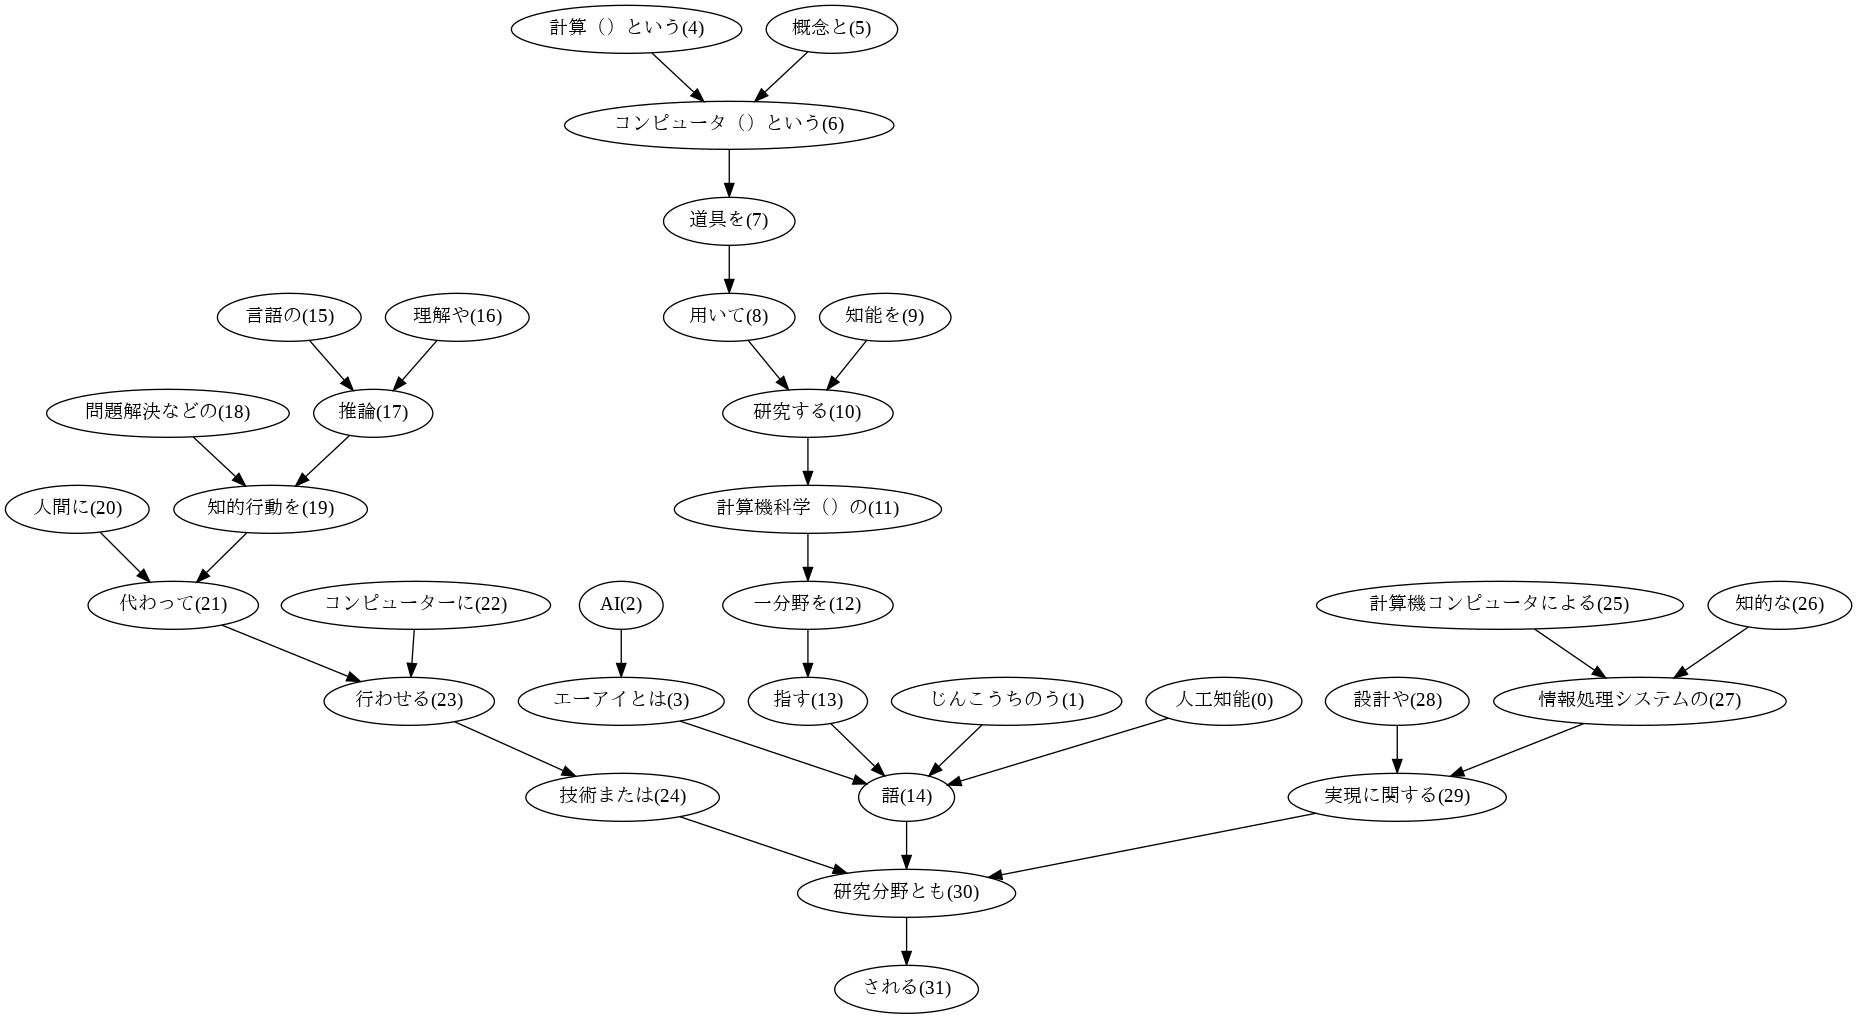

In [25]:
#44 https://srbrnote.work/archives/4205 graphvizについて https://qiita.com/hoto17296/items/16c7d55f34d28f99e308
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

sentence = sentences[2]
edges = []
for i, chunk in enumerate(sentence.chunks):
  if int(chunk.dst) != -1:
    modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(i) + ')'])
    modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence.chunks[int(chunk.dst)].morphs] + ['(' + str(chunk.dst) + ')'])
    edges.append([modifier, modifiee])
n = pydot.Node('node') #ノード作成
n.fontname ='MS Gothic' #フォント決定
graph = pydot.graph_from_edges(edges, directed=True) #有向グラフ(directed=Trueで)
graph.add_node(n)


display(Image(graph.create(format='png')))


In [26]:
#45
with open('./45.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの最初から順番に動詞を探す
          cases = []
          for src in chunk.srcs:  # 見つけた動詞の係り元chunkから助詞を探す
            cases = cases + [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞'] #助詞を動詞に対応するリストに追加していく
          if len(cases) > 0:  # 助詞が見つかった場合は重複除去(setにする)後辞書順にソートして出力
            cases = sorted(list(set(cases)))
            line = '{}\t{}'.format(morph.base, ' '.join(cases))
            print(line, file=f)
          break

In [27]:
#45(確認)
!cat ./45.txt | sort | uniq -c | sort -nr | head -n 10

    133 する	を
     98 する	て を
     48 する	て で は
     14 ある	が て に は
      9 行う	を
      7 呼ぶ	も
      7 する	から を
      6 行う	て に
      6 基づく	に
      6 なる	から で と


In [28]:
!cat ./45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 10

      9 行う	を
      6 行う	て に
      4 行う	が て に
      1 行う	まで を
      1 行う	から
      1 行う	に まで を
      1 行う	は を をめぐって
      1 行う	が で など は
      1 行う	が で に は


In [29]:
!cat ./45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 10

      8 なる	が と
      6 なる	に
      5 なる	が て と
      1 異なる	が で
      1 異なる	も
      1 無くなる	は
      1 なる	から が て で と は
      1 なる	から で と
      1 なる	て として に は
      1 なる	が と にとって は


In [30]:
!cat ./45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 10

      1 与える	が など に
      1 与える	に は を
      1 与える	が に


In [31]:
#46
with open('./46.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの最初から順番に動詞を探す
          cases = []
          argument = []
          for src in chunk.srcs:  # 見つけた動詞の係り元chunkから助詞を探す
            case = [morph.surface for morph in sentence.chunks[src].morphs if morph.pos == '助詞']
            if len(case) > 0:  # 助詞を含むchunkの場合は助詞と項を取得(変更点)
              cases = cases + case
              argument.append(''.join(morph.surface for morph in sentence.chunks[src].morphs if morph.pos != '記号'))
          if len(cases) > 0:  # 助詞が1つ以上見つかった場合は重複除去後(setにする)辞書順にソートし、項と合わせて出力(変更点)
            cases = sorted(list(set(cases)))
            line = '{}\t{}\t{}'.format(morph.base, ' '.join(cases), ' '.join(argument))
            print(line, file=f)
          break

In [32]:
#46(確認)
!cat ./46.txt | head -n 10

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	知的行動を 人間に
行う	て に	代わって コンピューターに
する	と も	研究分野とも
述べる	で に の は	解説で 佐藤理史は 次のように
する	で を	知的能力を コンピュータ上で
する	を	推論判断を
する	を	画像データを


In [33]:
#47
with open('./47.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence.chunks:
      for morph in chunk.morphs:
        if morph.pos == '動詞':  # chunkの最初から順番に動詞を探す
          for i, src in enumerate(chunk.srcs):  # 見つけた動詞の係り元chunkが「サ変接続名詞+を」で構成されるか確認
            if len(sentence.chunks[src].morphs) == 2 and sentence.chunks[src].morphs[0].pos1 == 'サ変接続' and sentence.chunks[src].morphs[0].pos == '名詞' and sentence.chunks[src].morphs[1].surface == 'を':
              predicate = ''.join([sentence.chunks[src].morphs[0].surface, sentence.chunks[src].morphs[1].surface, morph.base])
              cases = []
              argument = []
              for src_r in chunk.srcs[:i] + chunk.srcs[i + 1:]:  # 残りの係り元chunkから助詞を探す
                case = [morph.surface for morph in sentence.chunks[src_r].morphs if morph.pos == '助詞']
                if len(case) > 0:  # 助詞を含むchunkの場合は助詞と項を取得
                  cases = cases + case
                  argument.append(''.join(morph.surface for morph in sentence.chunks[src_r].morphs if morph.pos != '記号'))
              if len(cases) > 0:  # 助詞が1つ以上見つかった場合は重複除去後(setにする)辞書順にソートし、項と合わせて出力
                cases = sorted(list(set(cases)))
                line = '{}\t{}\t{}'.format(predicate, ' '.join(cases), ' '.join(argument))
                print(line, file=f)
              break

In [34]:
#47(確認)
!cat ./47.txt | cut -f 1 | sort | uniq -c | sort -nr | head -n 15

      3 注目を集める
      2 運転をする
      2 話をする
      2 研究をいる
      2 特許をする
      2 共同研究をおる
      1 開発を行う
      1 進化を見せる
      1 進化をいる
      1 追及を受ける
      1 議論を行う
      1 議論をくる
      1 記述をする
      1 解散をする
      1 解任をする


In [35]:
!cat ./47.txt | cut -f 1,2 | sort | uniq -c | sort -nr | head -n 15

      2 話をする	は
      2 特許をする	が に まで
      2 注目を集める	が
      1 開発を行う	は
      1 運転をする	て に
      1 運転をする	に
      1 進化を見せる	て において は
      1 進化をいる	て において は
      1 追及を受ける	て で と とともに は
      1 議論を行う	まで
      1 議論をくる	まで
      1 記述をする	と
      1 解散をする	が で は
      1 解任をする	て は
      1 経験を行う	に を


In [36]:
#48
sentence = sentences[2]
for chunk in sentence.chunks: #文章内の単語ごとに回す
  if '名詞' in [morph.pos for morph in chunk.morphs]:  # chunkが名詞を含むか確認
    path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')]
    while chunk.dst != -1:  # 名詞を含むchunkを先頭に、dstを根まで順に辿ってリストに追加
      path.append(''.join(morph.surface for morph in sentence.chunks[chunk.dst].morphs if morph.pos != '記号'))
      chunk = sentence.chunks[chunk.dst] #chunk更新
    print(' -> '.join(path))

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算（）という -> コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
コンピューターに 

In [37]:
#49 
from itertools import combinations #combinations関数のために導入 https://docs.python.org/ja/3/library/itertools.html 引数 p,r 長さrのタプル列、ソートされた順で重複なし
import re

sentence = sentences[2]
nouns = []
for i, chunk in enumerate(sentence.chunks):
  if '名詞' in [morph.pos for morph in chunk.morphs]:  # 名詞を含む文節を抽出
    nouns.append(i)
for i, j in combinations(nouns, 2):  # 名詞を含む文節のペアごとに係り受けパスを抽出(作成)
  path_i = []
  path_j = []
  while i != j:
    if i < j:
      path_i.append(i)
      i = sentence.chunks[i].dst
    else:
      path_j.append(j)
      j = sentence.chunks[j].dst
  if len(path_j) == 0:  # 1通り目
    chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence.chunks[path_i[0]].morphs])
    chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence.chunks[i].morphs])
    chunk_X = re.sub('X+', 'X', chunk_X)
    chunk_Y = re.sub('Y+', 'Y', chunk_Y)
    path_XtoY = [chunk_X] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_i[1:]] + [chunk_Y]
    print(' -> '.join(path_XtoY))
  else:  # 2通り目
    chunk_X = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence.chunks[path_i[0]].morphs])
    chunk_Y = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence.chunks[path_j[0]].morphs])
    chunk_k = ''.join([morph.surface for morph in sentence.chunks[i].morphs])
    chunk_X = re.sub('X+', 'X', chunk_X)
    chunk_Y = re.sub('Y+', 'Y', chunk_Y)
    path_X = [chunk_X] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_i[1:]]
    path_Y = [chunk_Y] + [''.join(morph.surface for morph in sentence.chunks[n].morphs) for n in path_j[1:]]
    print(' | '.join([' -> '.join(path_X), ' -> '.join(path_Y), chunk_k]))

X | （Yのう、、 | 語。
X | Y -> 〈エーアイ〉）とは、 | 語。
X | 〈Y〉）とは、 | 語。
X | 「『Y』という -> 『コンピュータ（）』という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野」を -> 指す | 語。
X | Yと -> 『コンピュータ（）』という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野」を -> 指す | 語。
X | 『Y』という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野」を -> 指す | 語。
X | Yを -> 用いて -> 研究する -> 計算機科学（）の -> 一分野」を -> 指す | 語。
X | 『Y』を -> 研究する -> 計算機科学（）の -> 一分野」を -> 指す | 語。
X | Yする -> 計算機科学（）の -> 一分野」を -> 指す | 語。
X | Yの -> 一分野」を -> 指す | 語。
X | Y」を -> 指す | 語。
X -> Y。
X -> 語。 | 「Yの -> 推論、 -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yや -> 推論、 -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y、 -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yを -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y」、または、 | 研究分野」とも
X -> 語。 | 「Y（Y）による -> 情報処理システムの -> 実現に関する | 研究分野」とも
X -> 語。 | Yな -> 情報処理システムの -> 実現に関する |